# Making a 3D Star Map Using the Hipparcos Dataset

In [456]:
!python --version

Python 3.6.4 :: Anaconda custom (64-bit)


# The Hipparcos Dataset

<img src="https://sci.esa.int/documents/35127/35542/1567215450097-Hipparcos_mission_logo_625.jpg" />

From the [European Space Agency website:](https://sci.esa.int/web/hipparcos)



> Unique to Europe was the very first space mission for measuring the positions, distances, motions, brightness and colours of stars - for astrometry, as the experts call it. ESA's Hipparcos satellite pinpointed more than 100 000 stars, 200 times more accurately than ever before. As astrometry has been the bedrock of the study of the Universe since ancient times, this leap forward has affected every branch of astronomy. The primary product from this pioneering and successful mission was a set of stellar catalogues, The Hipparcos and Tycho Catalogues, published by ESA in 1997.  

# I. Data Cleaning

Main reference for data cleaning: [Eduardo Martin Calleja's](http://balbuceosastropy.blogspot.com/) [work](http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html)  on the construction of Hertzspring-Russel Diagrams in Python.

Download from the Hipparcos dataset (I239) from [the VizieR website:](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/239/hip_main).

# The Hipparcos Dataset

### We select the following columns:
__1.__ __HIP__ 
   - Hipparcos number/identifier. This is the ID number of any star within the Hipparcos catalog. We will use this number as the index of our dataframe.

__2. RAhms__ & __DEhms__ 
   - Right Ascension and Declination in hrs/mins/secs
    
<img src="http://www.pas.rochester.edu/~blackman/ast104/celestialtime.gif" />

__3. Vmag__ 
   - Visual Magnitude; this tells us how bright a star, or generally any celestial object as it is viewed from the Earth.
    
<img src="https://en.es-static.us/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg" />


__4. Plx__ 
   - Parallax angle in milliarcseconds; distance (in parsecs) from Earth/Sun to a Star using trigonometric parallax. Earth-Sun distance is negligible compared to distance between stars.

<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/imgast/Stelpar.gif" />


__5. B-V__ 
   - Color index, Blue to Visible region of the EM spectrum; indicates the color of the star, which is correlated to its temperature. 
   
   Table values from: [What color are the stars?](http://www.vendian.org/mncharity/dir3/starcolor/details.html)
    
<img src="https://www.esri.com/arcgis-blog/wp-content/uploads/2018/03/colorChart2.png" />
    


__5. SpType__

   - Classification based on spectral characteristics; namely the elements that they absorb indicated by their spectral lines.
    
<img src="https://writescience.files.wordpress.com/2014/01/spectralsystem.jpg" />
    

### Example of Research done using Hipparcos Dataset

Paper Title:
[Cosmography of OB stars in the solar neighbourhood](https://www.aanda.org/articles/aa/abs/2015/12/aa27058-15/aa27058-15.html)

In [457]:
from IPython.display import IFrame

IFrame(src='http://www.sci-news.com/astronomy/esas-hipparcos-solar-neighborhood-03438.html', 
       width=700, height=600)

*** 

## Preliminary Data Cleaning

Import the primary Python libraries:

In [458]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib notebook

Read the tsv file with preliminary formatting.

In [459]:
filename = 'I239.tsv'
df = pd.read_csv(filename, skiprows=48, sep=';', header=None, index_col=0,
                   names = ['HIP','RAhms','DEhms','Vmag','Plx', 'CI','SpType'],
                   skipfooter=1, engine='python').replace(r'^\s*$', np.nan, regex=True).dropna()

df.head()

,RAhms,DEhms,Vmag,Plx,CI,SpType
HIP,,,,,,
1,00 00 00.22,+01 05 20.4,9.10,3.54,0.482,F5
2,00 00 00.91,-19 29 55.8,9.27,21.90,0.999,K3V
3,00 00 01.20,+38 51 33.4,6.61,2.81,-0.019,B9
4,00 00 02.01,-51 53 36.8,8.06,7.75,0.370,F0V
5,00 00 02.39,-40 35 28.4,8.55,2.87,0.902,G8III


In [460]:
df.tail()

,RAhms,DEhms,Vmag,Plx,CI,SpType
HIP,,,,,,
118318,23 59 51.30,+11 40 25.4,6.99,1.92,1.595,K2
118319,23 59 53.74,-22 25 41.4,8.23,10.63,0.639,G2V
118320,23 59 54.25,+05 57 23.9,7.59,5.00,0.999,K0
118321,23 59 54.78,-64 22 21.3,9.20,19.22,0.698,G5V
118322,23 59 54.91,-65 34 37.5,4.49,8.71,-0.075,B9IV


Inspect dataset stats:

In [461]:
df.describe()

,RAhms,DEhms,Vmag,Plx,CI,SpType
count,114472,114472,114472,114472,114472,114472
unique,113688,113250,1072,5361,2426,4070
top,07 03 14.21,+24 04 52.4,8.69,2.93,1.000,K0
freq,3,3,502,182,308,8537


and their data types:

In [462]:
df.dtypes

RAhms     object
DEhms     object
Vmag      object
Plx       object
CI        object
SpType    object
dtype: object

Convert RA and DE columns from dms to rad. Replace RAhms and DEhms with RArad and DErad respectively.

In [463]:
df['RAh'] = df["RAhms"].str.split(" ", n = 2, expand = True)[0].astype(float)
df['RAm'] = df["RAhms"].str.split(" ", n = 2, expand = True)[1].astype(float)/60
df['RAs'] = df["RAhms"].str.split(" ", n = 2, expand = True)[2].astype(float)/3600
df['RAhms'] = np.radians(15*(df['RAh'] + df['RAm'] + df['RAs']))


df['DEh'] = df["DEhms"].str.split(" ", n = 2, expand = True)[0].astype(float)
df['DEm'] = df["DEhms"].str.split(" ", n = 2, expand = True)[1].astype(float)/60
df['DEs'] = df["DEhms"].str.split(" ", n = 2, expand = True)[2].astype(float)/3600
df['DEhms'] = np.radians(15*(df['DEh'] + df['DEm'] + df['DEs']))


df = df.drop(['RAh', 'RAm', 'RAs','DEh', 'DEm', 'DEs'], axis=1)
df.columns = ['RArad', 'DErad', 'Vmag', 'Plx', 'CI', 'SpType']
df.tail()

,RArad,DErad,Vmag,Plx,CI,SpType
HIP,,,,,,
118318,6.282553,3.056173,6.99,1.92,1.595,K2
118319,6.282730,-5.647493,8.23,10.63,0.639,G2V
118320,6.282767,1.559444,7.59,5.00,0.999,K0
118321,6.282806,-16.657619,9.20,19.22,0.698,G5V
118322,6.282815,-16.865880,4.49,8.71,-0.075,B9IV


convert these columns to float datatypes

In [464]:
cols = list(df.columns)[2:-1]
cols

['Vmag', 'Plx', 'CI']

In [465]:
for col in cols:
    df[col] = df[col].astype(float)
df.dtypes

RArad     float64
DErad     float64
Vmag      float64
Plx       float64
CI        float64
SpType     object
dtype: object

In [466]:
df.describe()

,RArad,DErad,Vmag,Plx,CI
count,114472.000000,114472.000000,114472.000000,114472.000000,114472.000000
mean,3.170093,-0.399723,8.297756,7.105059,0.702421
std,1.803092,10.623890,1.248646,11.063782,0.490229
min,0.000016,-23.299004,-1.440000,-35.100000,-0.400000
25%,1.632786,-9.318949,7.610000,2.520000,0.341000
50%,3.180330,-0.182671,8.400000,4.580000,0.605000
75%,4.749510,8.255453,9.070000,8.260000,1.075000
max,6.282815,23.449218,13.610000,772.330000,5.460000


Remove rows with values less than 1 on Plx. These parallax angles are too small; they're too far away that the measured parallax angle might be inaccurate.

Reference: http://www.astronomy.ohio-state.edu/~pogge/Ast162/Unit1/distances.html

In [467]:
df = df.drop(df[df['Plx'] <= 1].index)
df.describe()

,RArad,DErad,Vmag,Plx,CI
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000
mean,3.164304,-0.414111,8.244360,7.793869,0.689006
std,1.805097,10.627804,1.252997,11.332004,0.471754
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000
25%,1.617333,-9.335723,7.560000,3.020000,0.350000
50%,3.176666,-0.197549,8.350000,5.040000,0.596000
75%,4.741218,8.204109,9.030000,8.800000,1.052000
max,6.282815,23.449218,13.110000,772.330000,5.460000


Create new column for distance based on parallax angles.

In [468]:
df['Plx_dist'] = 1000/df['Plx']

In [469]:
df.describe()

,RArad,DErad,Vmag,Plx,CI,Plx_dist
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000
mean,3.164304,-0.414111,8.244360,7.793869,0.689006,250.626856
std,1.805097,10.627804,1.252997,11.332004,0.471754,189.515070
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000,1.294783
25%,1.617333,-9.335723,7.560000,3.020000,0.350000,113.636364
50%,3.176666,-0.197549,8.350000,5.040000,0.596000,198.412698
75%,4.741218,8.204109,9.030000,8.800000,1.052000,331.125828
max,6.282815,23.449218,13.110000,772.330000,5.460000,990.099010


# II. Creating New Columns

We'll "expand" the Hipparcos dataset by creating new columns for the Absolute Magnitude, Effective Temperature, Luminosity and Stellar radii. 

## Add Absmag column

We add a column for the absolute magnitude of the stars in the Hipparcos dataset. The absolute magnitude of a star is its "brightness" if it was placed 10 parsecs from Earth. In relation to the apparent/visual magnitude $m$ and distance from Earth in parsecs $d$, the absolute magnitude $M$ is given by:

$$m-M=5\log_{10} \bigg(\frac{d}{10}\bigg) $$

<img src='https://s22380.pcdn.co/wp-content/uploads/Sirius_Mags_m.gif'>

Thus, for the Absmag column:

In [470]:
df['Absmag'] = df['Vmag'] - 5*np.log10(df['Plx_dist']/10)
df.describe()

,RArad,DErad,Vmag,Plx,CI,Plx_dist,Absmag
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000
mean,3.164304,-0.414111,8.244360,7.793869,0.689006,250.626856,1.877530
std,1.805097,10.627804,1.252997,11.332004,0.471754,189.515070,2.041373
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000,1.294783,-8.728393
25%,1.617333,-9.335723,7.560000,3.020000,0.350000,113.636364,0.492545
50%,3.176666,-0.197549,8.350000,5.040000,0.596000,198.412698,1.658060
75%,4.741218,8.204109,9.030000,8.800000,1.052000,331.125828,3.147817
max,6.282815,23.449218,13.110000,772.330000,5.460000,990.099010,15.449015


## Add EffTemp column

To solve for the Effective temperature, we use [Ballesteros' formula](https://arxiv.org/pdf/1201.1809.pdf), 


$$ T= 4600 K \bigg({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\bigg) $$

which was obtained by considering stars as black bodies. Fortunately, this equation has a [PyAstronomy](https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/aslDoc/aslExt_1Doc/ramirez2005.html) implementation.

In [471]:
from PyAstronomy import pyasl

b = pyasl.BallesterosBV_T()

df['EffTemp']= b.bv2T(df['CI'])
df.describe()

,RArad,DErad,Vmag,Plx,CI,Plx_dist,Absmag,EffTemp
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000
mean,3.164304,-0.414111,8.244360,7.793869,0.689006,250.626856,1.877530,6228.557452
std,1.805097,10.627804,1.252997,11.332004,0.471754,189.515070,2.041373,2012.505598
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000,1.294783,-8.728393,1499.338347
25%,1.617333,-9.335723,7.560000,3.020000,0.350000,113.636364,0.492545,4621.258666
50%,3.176666,-0.197549,8.350000,5.040000,0.596000,198.412698,1.658060,5983.249562
75%,4.741218,8.204109,9.030000,8.800000,1.052000,331.125828,3.147817,7158.202448
max,6.282815,23.449218,13.110000,772.330000,5.460000,990.099010,15.449015,21707.421707


## Add Lum column

The Luminosity of any star $L$ is related to our Sun's Luminosty $L_{\odot}$ and that star's absolute magnitude $M$ by:

$$ L = L_{\odot} 10^{\frac{M_{\odot}-M}{2.5}} $$

In [472]:
L_sun = 3.839*10**26
Absmag_sun = 4.74

df['Lum'] = L_sun*10**((Absmag_sun-df['Absmag'])/2.5)
df.describe()

,RArad,DErad,Vmag,Plx,CI,Plx_dist,Absmag,EffTemp,Lum
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,1.044810e+05
mean,3.164304,-0.414111,8.244360,7.793869,0.689006,250.626856,1.877530,6228.557452,2.460935e+28
std,1.805097,10.627804,1.252997,11.332004,0.471754,189.515070,2.041373,2012.505598,3.324433e+29
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000,1.294783,-8.728393,1499.338347,1.998077e+22
25%,1.617333,-9.335723,7.560000,3.020000,0.350000,113.636364,0.492545,4621.258666,1.663762e+27
50%,3.176666,-0.197549,8.350000,5.040000,0.596000,198.412698,1.658060,5983.249562,6.561364e+27
75%,4.741218,8.204109,9.030000,8.800000,1.052000,331.125828,3.147817,7158.202448,1.919554e+28
max,6.282815,23.449218,13.110000,772.330000,5.460000,990.099010,15.449015,21707.421707,9.366457e+31


## Add Radius

Stefan-Boltzmann Law

$$ L = 4 \pi R^{2}\sigma T_{eff}^{4} $$

$$ R = \sqrt{\frac{L}{4\pi \sigma T_{eff}^{4}}} $$

In [473]:
from scipy.constants import sigma

df['Radius'] = np.sqrt((df['Lum'])/(4*np.pi*sigma*(df['EffTemp']**4)))

df.describe()

,RArad,DErad,Vmag,Plx,CI,Plx_dist,Absmag,EffTemp,Lum,Radius
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,1.044810e+05,1.044810e+05
mean,3.164304,-0.414111,8.244360,7.793869,0.689006,250.626856,1.877530,6228.557452,2.460935e+28,4.705159e+09
std,1.805097,10.627804,1.252997,11.332004,0.471754,189.515070,2.041373,2012.505598,3.324433e+29,6.950169e+09
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000,1.294783,-8.728393,1499.338347,1.998077e+22,7.102962e+06
25%,1.617333,-9.335723,7.560000,3.020000,0.350000,113.636364,0.492545,4621.258666,1.663762e+27,1.089766e+09
50%,3.176666,-0.197549,8.350000,5.040000,0.596000,198.412698,1.658060,5983.249562,6.561364e+27,1.874441e+09
75%,4.741218,8.204109,9.030000,8.800000,1.052000,331.125828,3.147817,7158.202448,1.919554e+28,5.902424e+09
max,6.282815,23.449218,13.110000,772.330000,5.460000,990.099010,15.449015,21707.421707,9.366457e+31,2.128472e+11


# Plotting

In [474]:
df.loc[91262]

RArad           4.87355
DErad           10.1534
Vmag               0.03
Plx              128.93
CI               -0.001
SpType           A0Vvar
Plx_dist        7.75615
Absmag          0.58177
EffTemp         10137.7
Lum         1.76811e+28
Radius      1.53272e+09
Name: 91262, dtype: object

In [475]:
#cbar_r = '2000 < EffTemp < 22000'

In [520]:
ly = 10
lim = 0.306601*ly 
#df_n = df[df['Plx_dist'].values < 0.306601*ly]

<IPython.core.display.Javascript object>


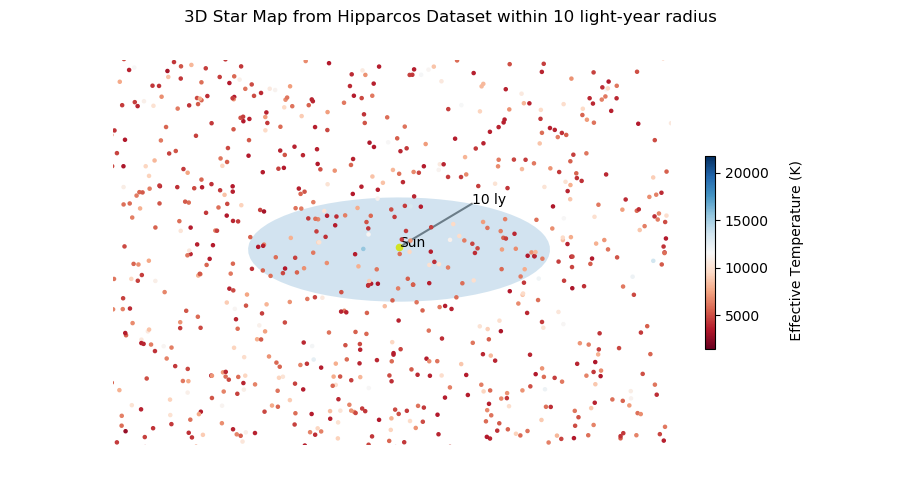

c:\users\llagman\anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


(-3.0660100000000003,
 3.0660100000000003,
 -3.0660100000000003,
 3.0660100000000003)

In [524]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111, projection='3d')

x = df['Plx_dist']*np.sin(df['DErad'])*np.cos(df['RArad'])
y = df['Plx_dist']*np.sin(df['DErad'])*np.sin(df['RArad'])
z = df['Plx_dist']*np.cos(df['DErad'])

plot = ax.scatter(x,
                  y,
                  z, 
                  marker='.',
                  c=df['EffTemp'],
                  cmap=cm.get_cmap('RdBu'), alpha=1)

#Sun
ax.scatter(0,0,0,c='yellow', marker='o')
ax.annotate(s='Sun', xy=(0,0) ) 

#Custom Ecliptic range
p = plt.Circle((0, 0), lim, alpha=0.2)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

#Range line
ax.plot((0,0,0),(lim,lim,0),c="black", alpha=0.5)
ax.text(0,lim,0,  f'{str(ly)} ly', color='k') 

ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

cbar = fig.colorbar(plot, ax=ax, shrink=0.5)
cbar.ax.set_ylabel(np.linspace(0,22000,5))
cbar.set_label("\n Effective Temperature (K)")

fig.suptitle(f"3D Star Map from Hipparcos Dataset within {str(ly)} light-year radius")
ax.grid(False)
ax.axis('off')

In [369]:
df.describe()

,RArad,DErad,Vmag,Plx,CI,Plx_dist,Absmag,EffTemp,Lum,Radius
count,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,104481.000000,1.044810e+05,1.044810e+05
mean,3.164304,-0.414111,8.244360,7.793869,0.689006,250.626856,1.877530,6228.557452,2.460935e+28,4.705159e+09
std,1.805097,10.627804,1.252997,11.332004,0.471754,189.515070,2.041373,2012.505598,3.324433e+29,6.950169e+09
min,0.000016,-23.299004,-1.440000,1.010000,-0.400000,1.294783,-8.728393,1499.338347,1.998077e+22,7.102962e+06
25%,1.617333,-9.335723,7.560000,3.020000,0.350000,113.636364,0.492545,4621.258666,1.663762e+27,1.089766e+09
50%,3.176666,-0.197549,8.350000,5.040000,0.596000,198.412698,1.658060,5983.249562,6.561364e+27,1.874441e+09
75%,4.741218,8.204109,9.030000,8.800000,1.052000,331.125828,3.147817,7158.202448,1.919554e+28,5.902424e+09
max,6.282815,23.449218,13.110000,772.330000,5.460000,990.099010,15.449015,21707.421707,9.366457e+31,2.128472e+11


In [371]:
df.loc[91262]

RArad           4.87355
DErad           10.1534
Vmag               0.03
Plx              128.93
CI               -0.001
SpType           A0Vvar
Plx_dist        7.75615
Absmag          0.58177
EffTemp         10137.7
Lum         1.76811e+28
Radius      1.53272e+09
Name: 91262, dtype: object

In [519]:
np.where((-lim < x) & (x < lim))

(array([    65,     84,    121, ..., 104334, 104337, 104430], dtype=int64),)